IMPORT THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/covid.csv")
ef=pd.read_csv("/content/covid_grouped.csv")
gf=pd.read_csv("/content/coviddeath.csv")
print(df)
print(ef)
print(gf)

In [ ]:
print(df.head(5))

In [ ]:
print(df.info())

In [ ]:
df.isnull().sum()

,0
Country/Region,0
Continent,1
Population,1
TotalCases,0
NewCases,205
TotalDeaths,21
NewDeaths,206
TotalRecovered,4
NewRecovered,206
ActiveCases,4


In [ ]:
print(df['Continent'].mode())

In [ ]:
df['Continent'].fillna(df['Continent'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

,0
Country/Region,0
Continent,0
Population,0
TotalCases,0
NewCases,0
TotalDeaths,0
NewDeaths,0
TotalRecovered,0
NewRecovered,0
ActiveCases,0


In [ ]:
df['NewCases'].fillna(df['NewCases'].mean(),inplace=True)

In [ ]:
df['TotalDeaths'].fillna(df['TotalDeaths'].mean(),inplace=True)

In [ ]:
df['NewDeaths'].fillna(df['NewDeaths'].mean(),inplace=True)

In [ ]:
df['NewRecovered'].fillna(df['NewRecovered'].mean(),inplace=True)

In [ ]:
df['TotalRecovered'].fillna(df['TotalRecovered'].mean(),inplace=True)

In [ ]:
df['ActiveCases'].fillna(df['ActiveCases'].mean(),inplace=True)

In [ ]:
df['Serious,Critical'].fillna(df['Serious,Critical'].mean(),inplace=True)

In [ ]:
df['WHO Region'].fillna(df['WHO Region'].mode()[0],inplace=True)

In [ ]:
df['TotalTests'].fillna(df['TotalTests'].mean(),inplace=True)

In [ ]:
df['NewRecovered'].fillna(df['NewRecovered'].mean(),inplace=True)

In [ ]:
df['Tot Cases/1M pop'].fillna(df['Tot Cases/1M pop'].mean(),inplace=True)

In [ ]:
df['Deaths/1M pop'].fillna(df['Deaths/1M pop'].mean(),inplace=True)

In [ ]:
df['Tests/1M pop'].fillna(df['Tests/1M pop'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

,0
Country/Region,0
Continent,0
Population,1
TotalCases,0
NewCases,0
TotalDeaths,0
NewDeaths,0
TotalRecovered,0
NewRecovered,0
ActiveCases,0


In [ ]:
gf['Number of COVID-19 Deaths'].fillna(gf['Number of COVID-19 Deaths'].mean(),inplace=True)

In [ ]:
gf['Flag'].fillna(gf['Flag'].mode()[0],inplace=True)

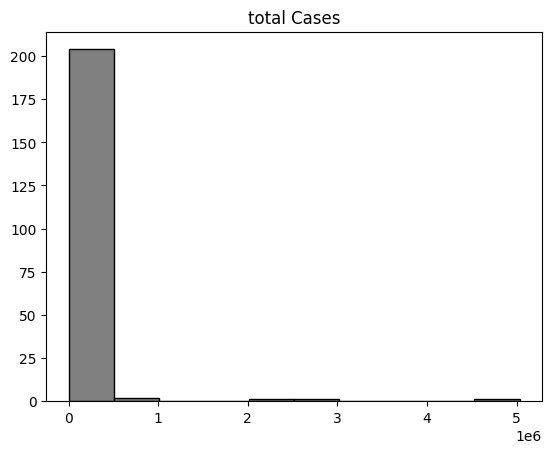

In [160]:
  plt.hist(df['TotalCases'],bins=10,color='gray',edgecolor='black')
  plt.title('total Cases')
  plt.show()

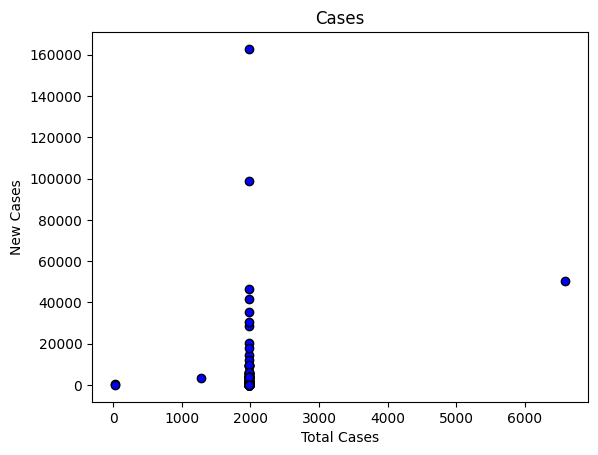

In [159]:
plt.scatter(df['NewCases'],df['TotalDeaths'],color='blue',edgecolor='black')
plt.title('Cases')
plt.xlabel('Total Cases')
plt.ylabel('New Cases')
plt.show()

In [ ]:
numerical_columns=['Population','NewCases','TotalDeaths']
def clean_and_convert_to_int(column):
  column_numeric=pd.to_numeric(column,errors='coerce')
  column_filled=column_numeric.fillna(0)
  return column_filled.astype(int)
for col in numerical_columns:
  if col in df.columns:
    df[col]=clean_and_convert_to_int(df[col])


In [ ]:
numerical_columns=['NewDeaths','TotalRecovered','NewRecovered','ActiveCases','Serious,Critical','Tot Cases/1M pop','Deaths/1m pop','TotalTests','Tests/1M pop']
def clean_and_convert_to_int(column):
  column_numeric=pd.to_numeric(column,errors='coerce')
  column_filled=column_numeric.fillna(0)
  return column_filled.astype(int)
for col in numerical_columns:
  if col in df.columns:
    df[col]=clean_and_convert_to_int(df[col])


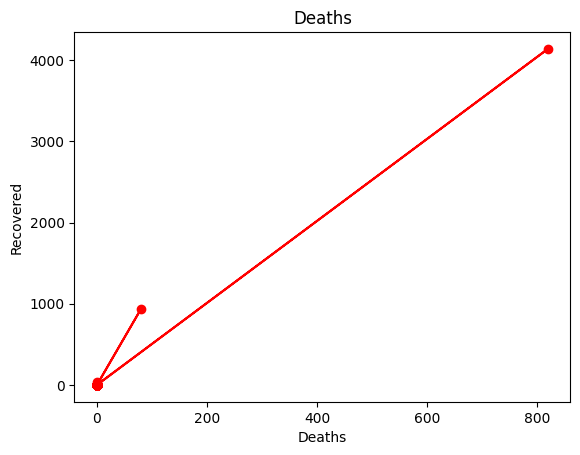

In [ ]:
plt.plot(df['NewDeaths'],df['NewRecovered'],color='red',marker='o')
plt.title('Deaths')
plt.xlabel('Deaths')
plt.ylabel('Recovered')
plt.show()

In [ ]:
print(ef.info())

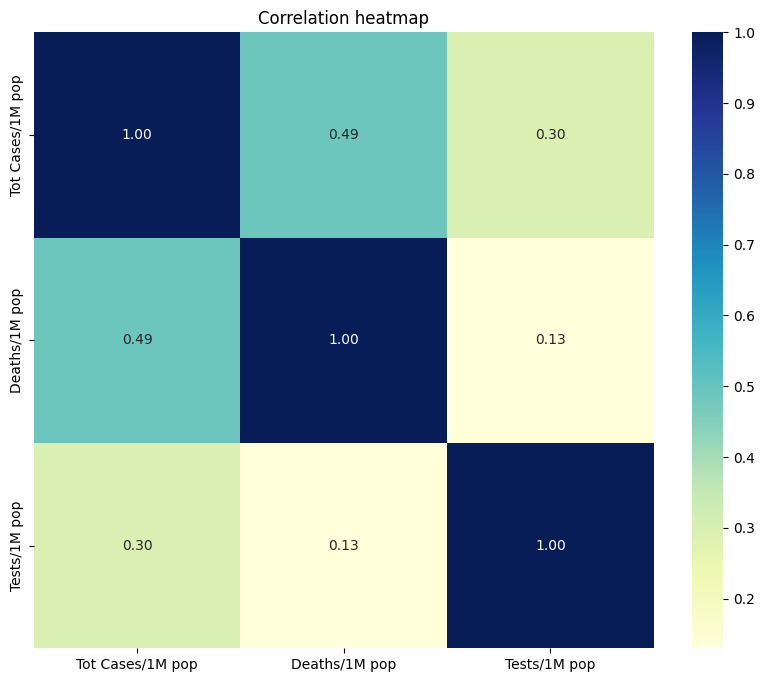

In [158]:
plt.figure(figsize=(10,8))
sns.heatmap(df[["Tot Cases/1M pop","Deaths/1M pop","Tests/1M pop"]].corr(),annot=True,cmap="YlGnBu",fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [103]:
ef.head(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,AFG
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,ALB
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,DZA
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,AND
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,AGO


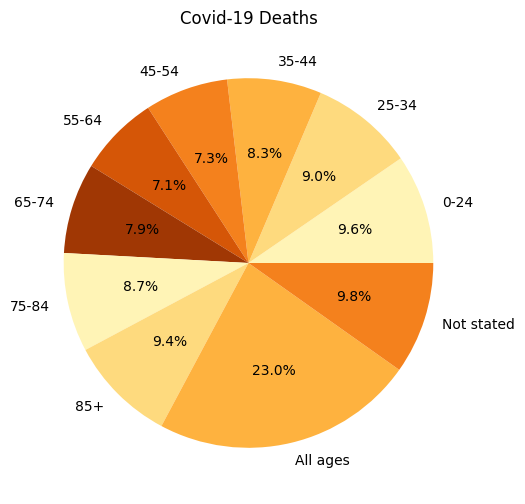

In [157]:
plt.figure(figsize=(8,6))
deaths = gf.groupby('Age Group')['Number of COVID-19 Deaths'].sum()
plt.pie(deaths, labels=list(deaths.index), autopct='%1.1f%%', colors=sns.color_palette('YlOrBr'))
plt.title('Covid-19 Deaths')
plt.show()

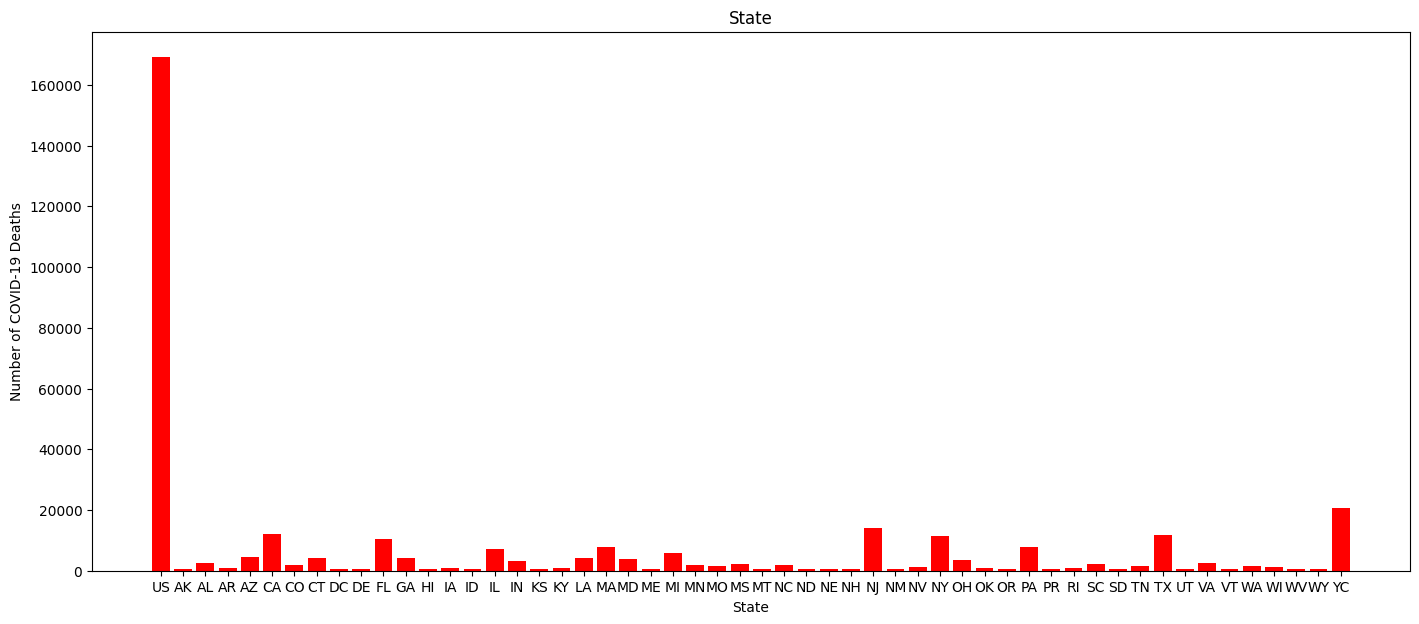

In [ ]:
plt.figure(figsize=(17,7))
plt.bar(gf['State'],gf['Number of COVID-19 Deaths'],color='red')
plt.xlabel('State')
plt.ylabel('Number of COVID-19 Deaths')
plt.title('State')
plt.show()

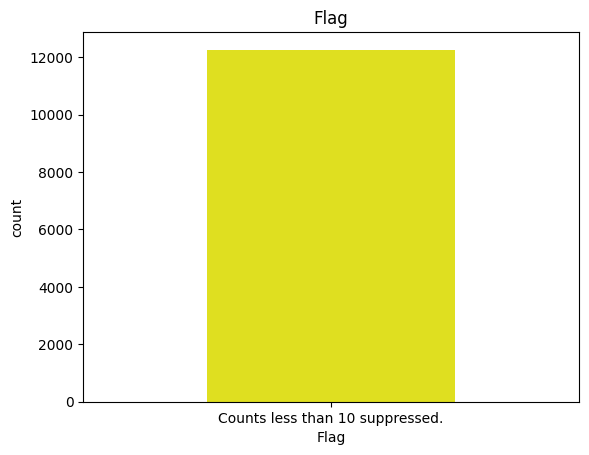

In [155]:
sns.countplot(x='Flag',data=gf,color='yellow',width=0.5)
plt.title('Flag')
plt.show()

In [ ]:
print(ef.info())

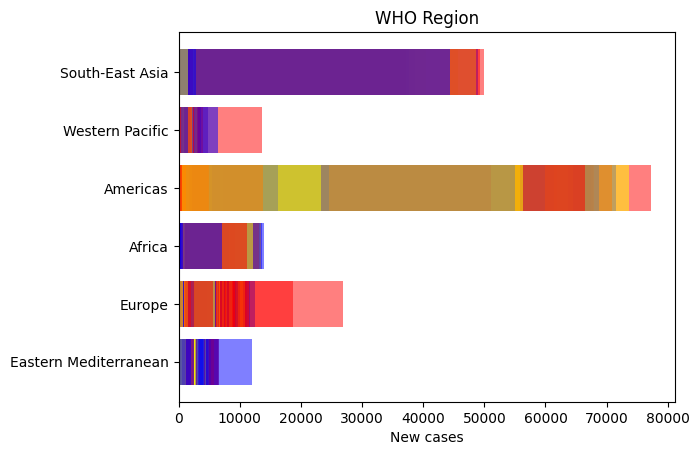

In [131]:
plt.barh(ef['WHO Region'],ef['New cases'],align='center',color=['Yellow','Red','Blue'],alpha=0.5)
plt.title('WHO Region')
plt.xlabel('New cases')
plt.show()

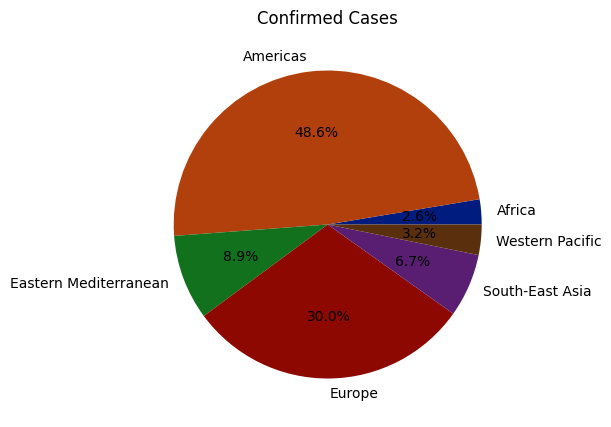

In [165]:
plt.figure(figsize=(10,5))
deaths = ef.groupby('WHO Region')['Confirmed'].sum()
plt.pie(deaths, labels=list(deaths.index), autopct='%1.1f%%', colors=sns.color_palette("dark"))
plt.title('Confirmed Cases')
plt.show()

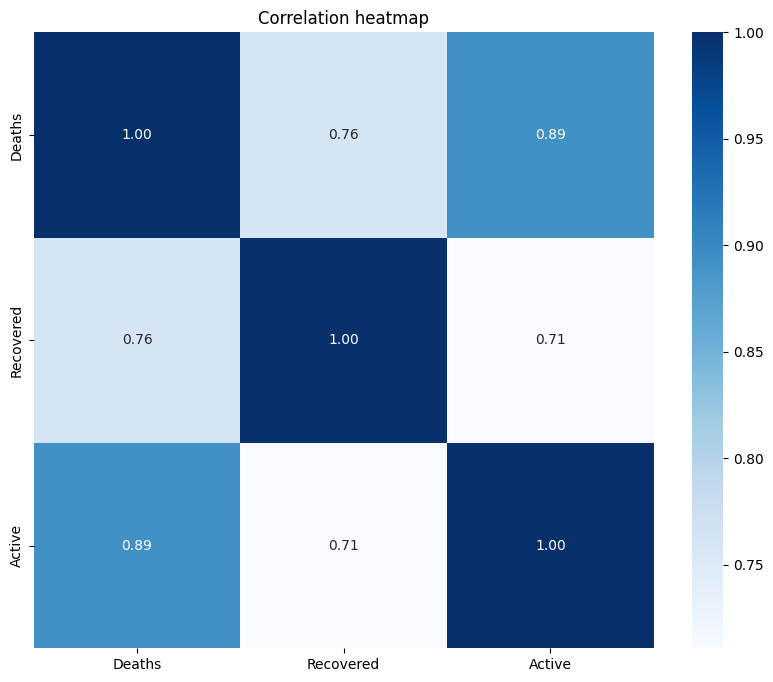

In [150]:
plt.figure(figsize=(10,8))
sns.heatmap(ef[["Deaths","Recovered","Active"]].corr(),annot=True,cmap="Blues",fmt=".2f")
plt.title("Correlation heatmap")
plt.show()